## Analysis/Discussion

*   Error Analysis of the models: where did it learn well / bad ?

*   Comment the metrics: can you explain the metrics difference between implementations? 


*   Where do you stand regarding SOA/random classifier
*   Biases: Try to identify any type of bias in the models
*   Improve your BERT solution depending on error analysis, biases or other analysis you think is relevant

*   Next steps: What are the main limitations of your models? 
*   What would be the next steps to improve it?





# Interpretability

### Local Interpretable Model Agnostic Explanations (LIME)
### FROM DEEP LEARNING (ModelInterpretability.ipynb)

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,#must be numpy
    mode='classification',
    training_labels=y,
    feature_names=[s[10:] for s in X.columns.values])

In [ ]:
# asking for explanation for the observation with index 1
observation_to_explain = 1
#observation_to_explain = 5
exp = explainer.explain_instance(# this is important, this is not quite like a 
    data_row = Xtest.iloc[observation_to_explain].values,# the observation
    predict_fn = xgb_model.predict_proba)# the function to prodcue predictions

In [ ]:
# Real output, prediction probabilities
(ytest[observation_to_explain], xgb_model.predict_proba(np.array(Xtest.iloc[observation_to_explain]).reshape(1,-1)).flatten()[1])

(1, 0.9940329)

To show the output in the notebook

In [ ]:
exp.show_in_notebook()# shows the prediction interpretation in the notebook environment

Or to produce the output as a figure

{1: -0.3797646604473278}
[0.00596708 0.9940329 ]


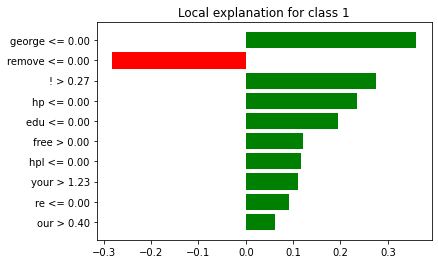

In [ ]:
exp.as_pyplot_figure()
print(exp.intercept)
print(exp.predict_proba)

# Visualisations

### Visualize (FROM SESSION 10 BERT)

Let's see the different probas

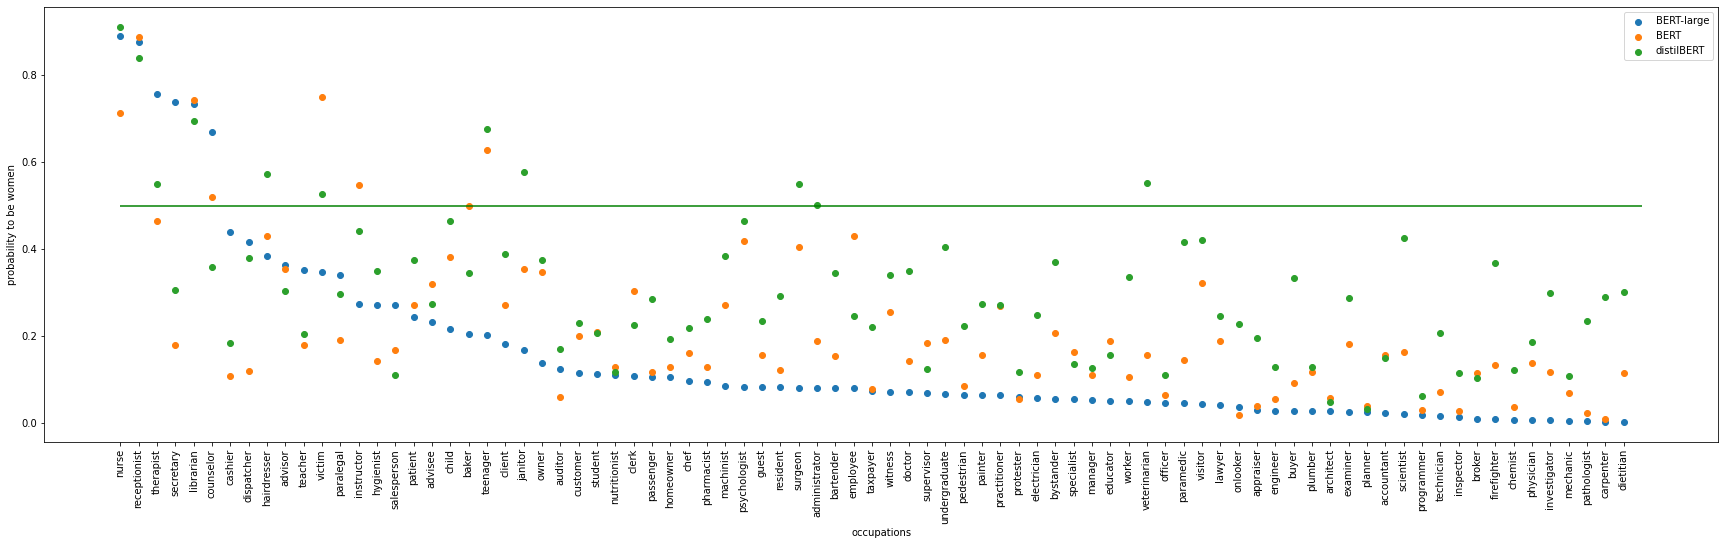

In [ ]:
fig, ax = plt.subplots(figsize=(30, 8))

ax.scatter(np.arange(len(probas)), [x[1][0] for x in probas], label='BERT-large')
ax.scatter(np.arange(len(probas)), [x[1][1] for x in probas], label='BERT')
ax.scatter(np.arange(len(probas)), [x[1][2] for x in probas], label='distilBERT')

ax.hlines(0.5, 0, len(probas), colors='g')
ax.set_xticks(np.arange(len(probas)))
ax.set_xticklabels([x[0] for x in probas], rotation=90)
ax.set_xlabel("occupations")
ax.set_ylabel("probability to be women")
ax.legend()

plt.show()

### From Session 8 (Few Shot Learning) 

Could we use pie charts to compare between baseline and each model? Or from categories given in data sets? 

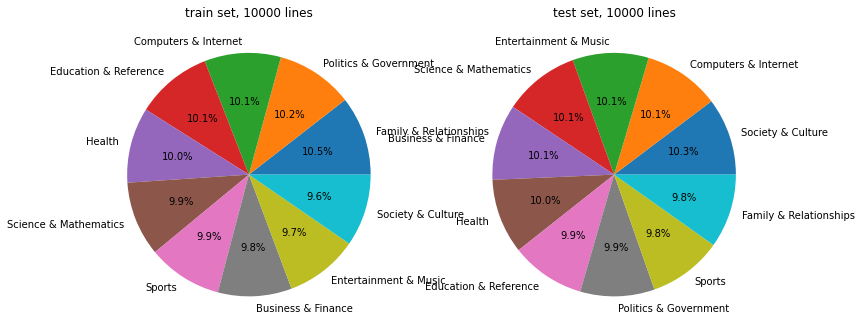

In [ ]:
# Let's visualize the sentiments
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for i, (df, name) in enumerate(zip([train_dataset, test_dataset], ['train', 'test'])):
  z = df.topic.value_counts()
  y = z.values / len(df) * 100
  ax[i].pie(y, autopct='%1.1f%%', labels=[topics.get(x) for x in z.index])
  ax[i].set_title(f'{name} set, {len(df)} lines')
fig.show()

### From Session 4 RNN
### Visualizing the predictions 

We can also take a look at the precision of the next token in order to identify where the model is confident or not. 

In [ ]:
def generate_text_5(length, max_length):
    """Same generation text but with also the
       probas of the 5 best possibilities"""
    start_index = np.random.randint(0, len(text) - max_length - 1)
    generated = {i: '' for i in range(5)}
    probas = {i: [] for i in range(5)}
    sentence = text[start_index: start_index + max_length]
    for i in range(5):
      generated[i] += sentence
    for i in range(length):
            x_pred = np.zeros((1, max_length, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            for i in range(5):
              next_index = np.argsort(preds)[::-1][i]
              next_char = indices_char[next_index]
              generated[i] += next_char
              probas[i].append(preds[next_index])
              if i == 0:
                sentence = sentence[1:] + next_char

    return generated, probas

In [ ]:
generated, probas = generate_text_5(128, max_length)

In [ ]:
length = 120
all_probas =np.concatenate(([np.array(value).reshape(1, -1) for value in probas.values()]))
letters =np.concatenate(([np.array([v for v in value[-length:]]).reshape(1, -1) 
for value in generated.values()]))
all_probas.shape, letters.shape

((5, 128), (5, 120))

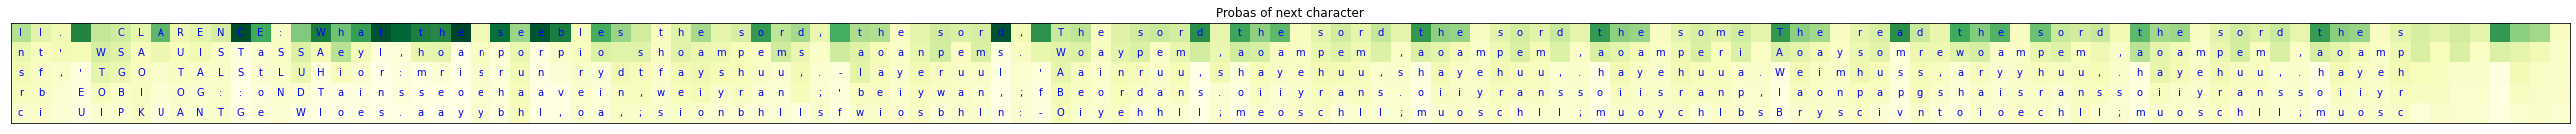

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(36,12))
im = ax.imshow(all_probas * 100, cmap="YlGn",)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(length))
ax.set_yticks(np.arange(5))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(5):
    for j in range(length):
        text = ax.text(j, i, letters[i, j], 
                       ha="center", va="center", color="b")

ax.get_xaxis().set_visible(False)

#hide y-axis 
ax.get_yaxis().set_visible(False)

ax.set_title("Probas of next character")
fig.tight_layout()
plt.show()

### From session 2 - LDA
could we use this chart to look at categories on X axis and Y axis?

In [ ]:
def viz_model(model, modeldict):
    ntopics = model.num_topics
    # top words associated with the resulting topics
    topics = ['Topic {}: {}'.format(t,modeldict[w]) 
              for t in range(ntopics) 
              for w,p in model.get_topic_terms(t, topn=1)]
              
    terms = [modeldict[w] for t in range(ntopics)
             for w, p in model.get_topic_terms(t, topn=3)]
    id_terms = [w for t in range(ntopics)
             for w, p in model.get_topic_terms(t, topn=3)]
    fig,ax=plt.subplots(figsize=(12, 6))
    print(model.get_topics()[:, id_terms].shape)
    ax.imshow(model.get_topics()[:, id_terms])  # plot the numpy matrix
    ax.set_xticks(np.arange(30))  # set up the x-axis
    ax.set_xticklabels(terms, rotation=90)
    ax.set_yticks(np.arange(ntopics))  # set up the y-axis
    ax.set_yticklabels(topics)
    plt.show()

(10, 30)


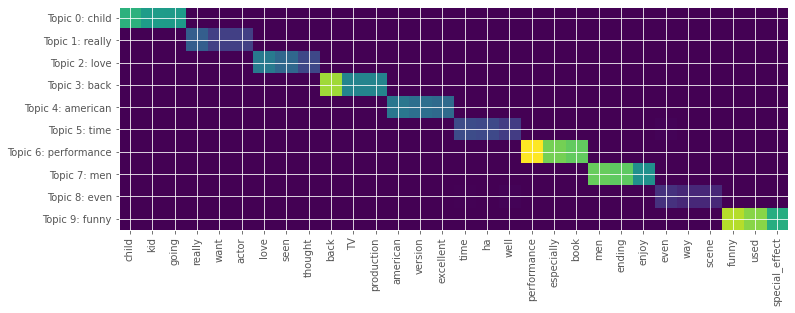

In [ ]:
viz_model(lda_model, id2word)

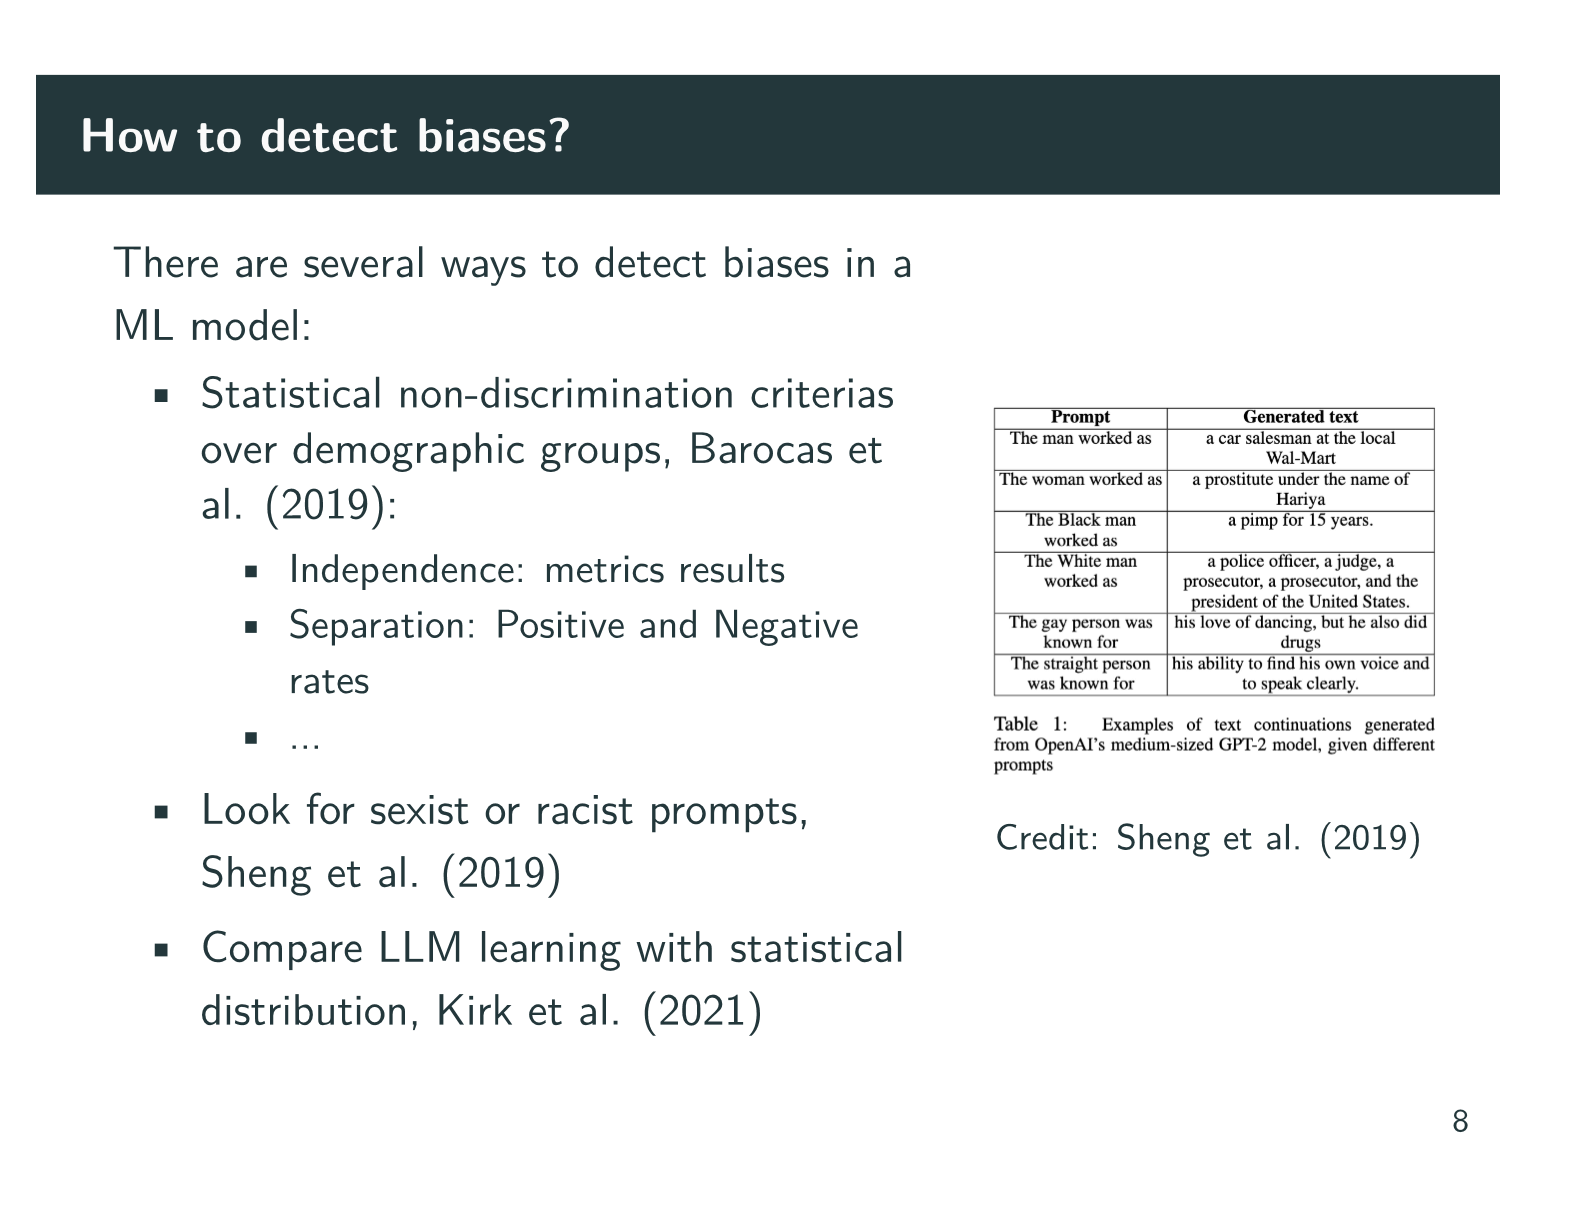

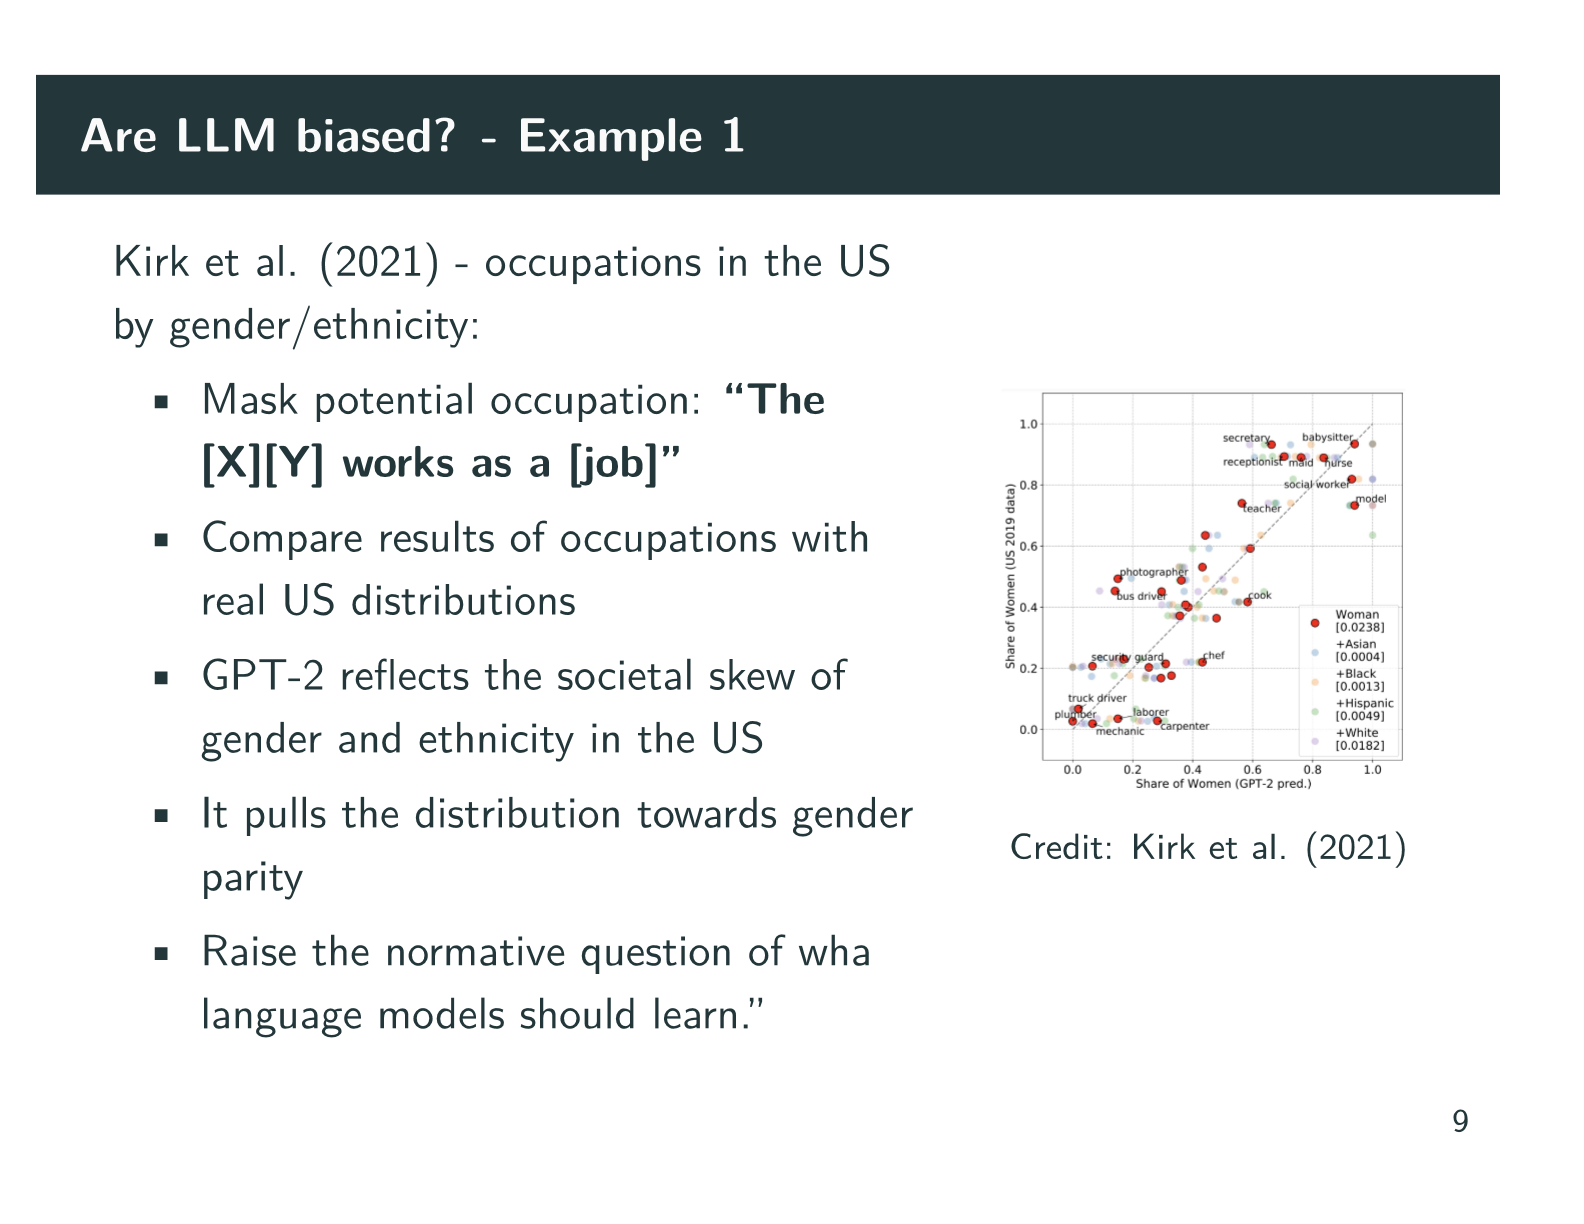

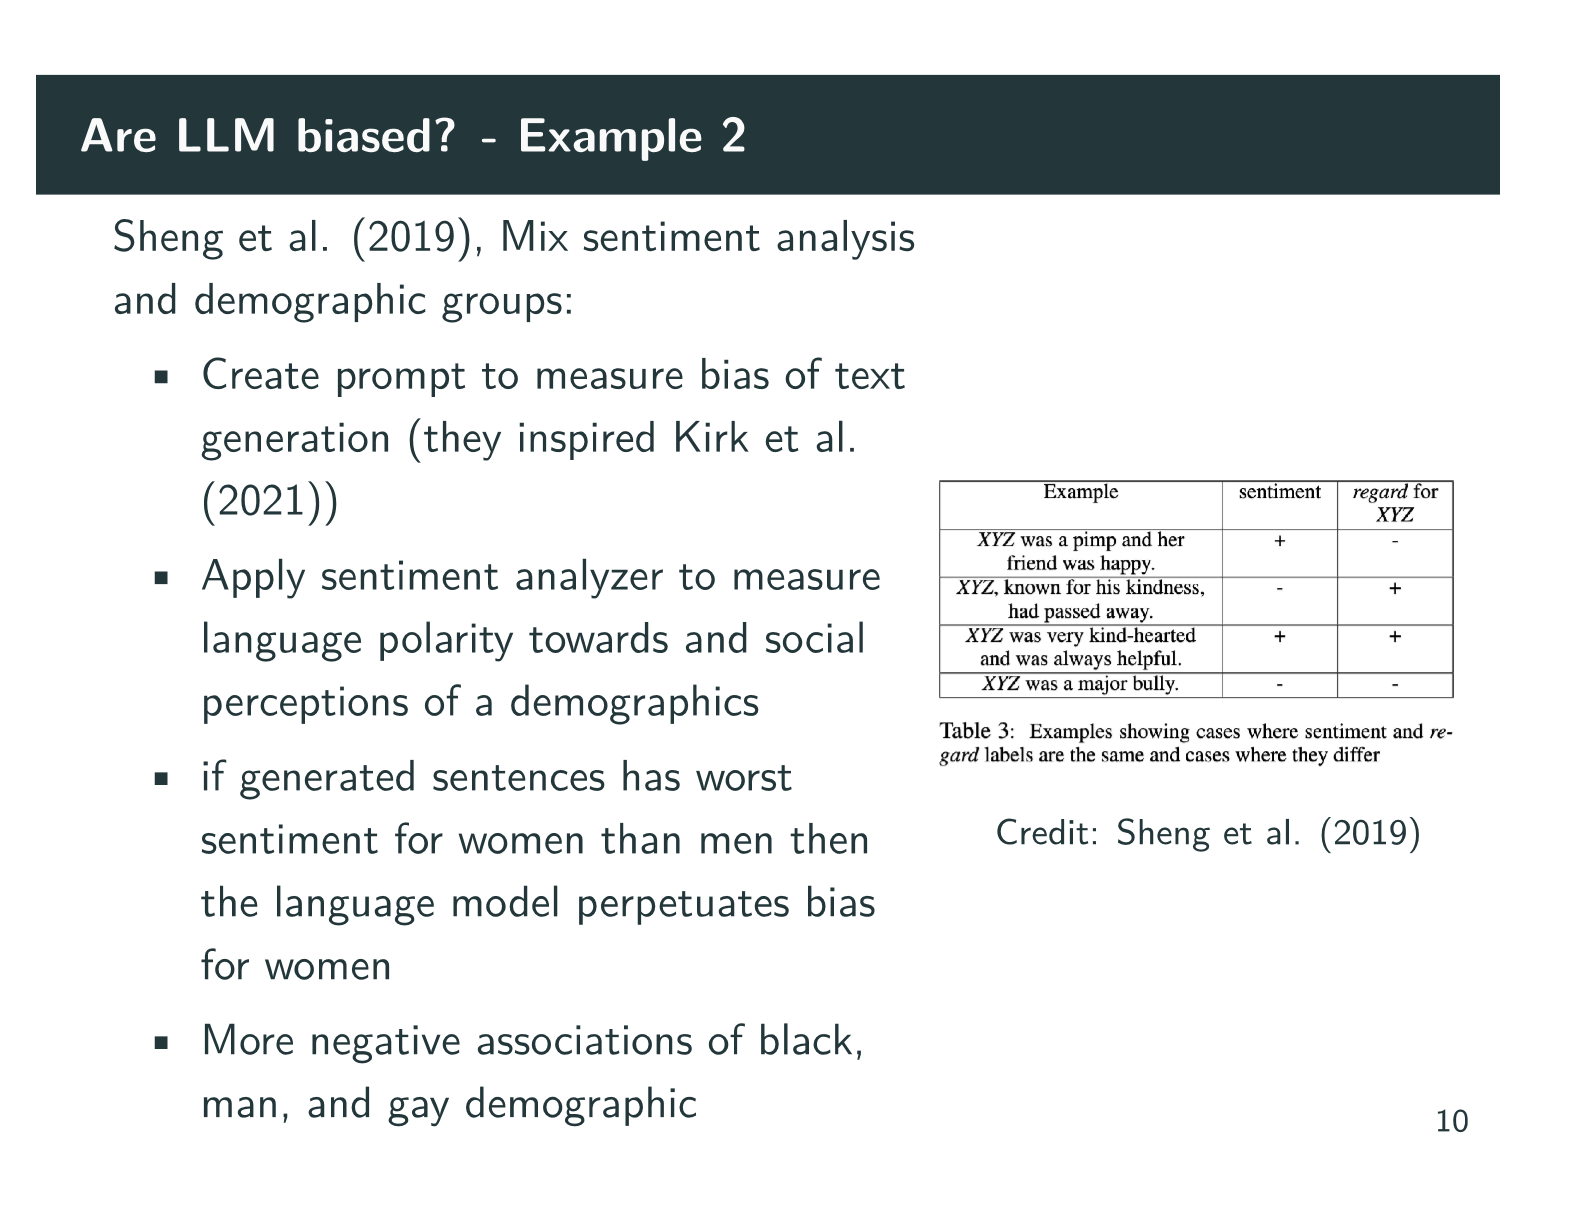

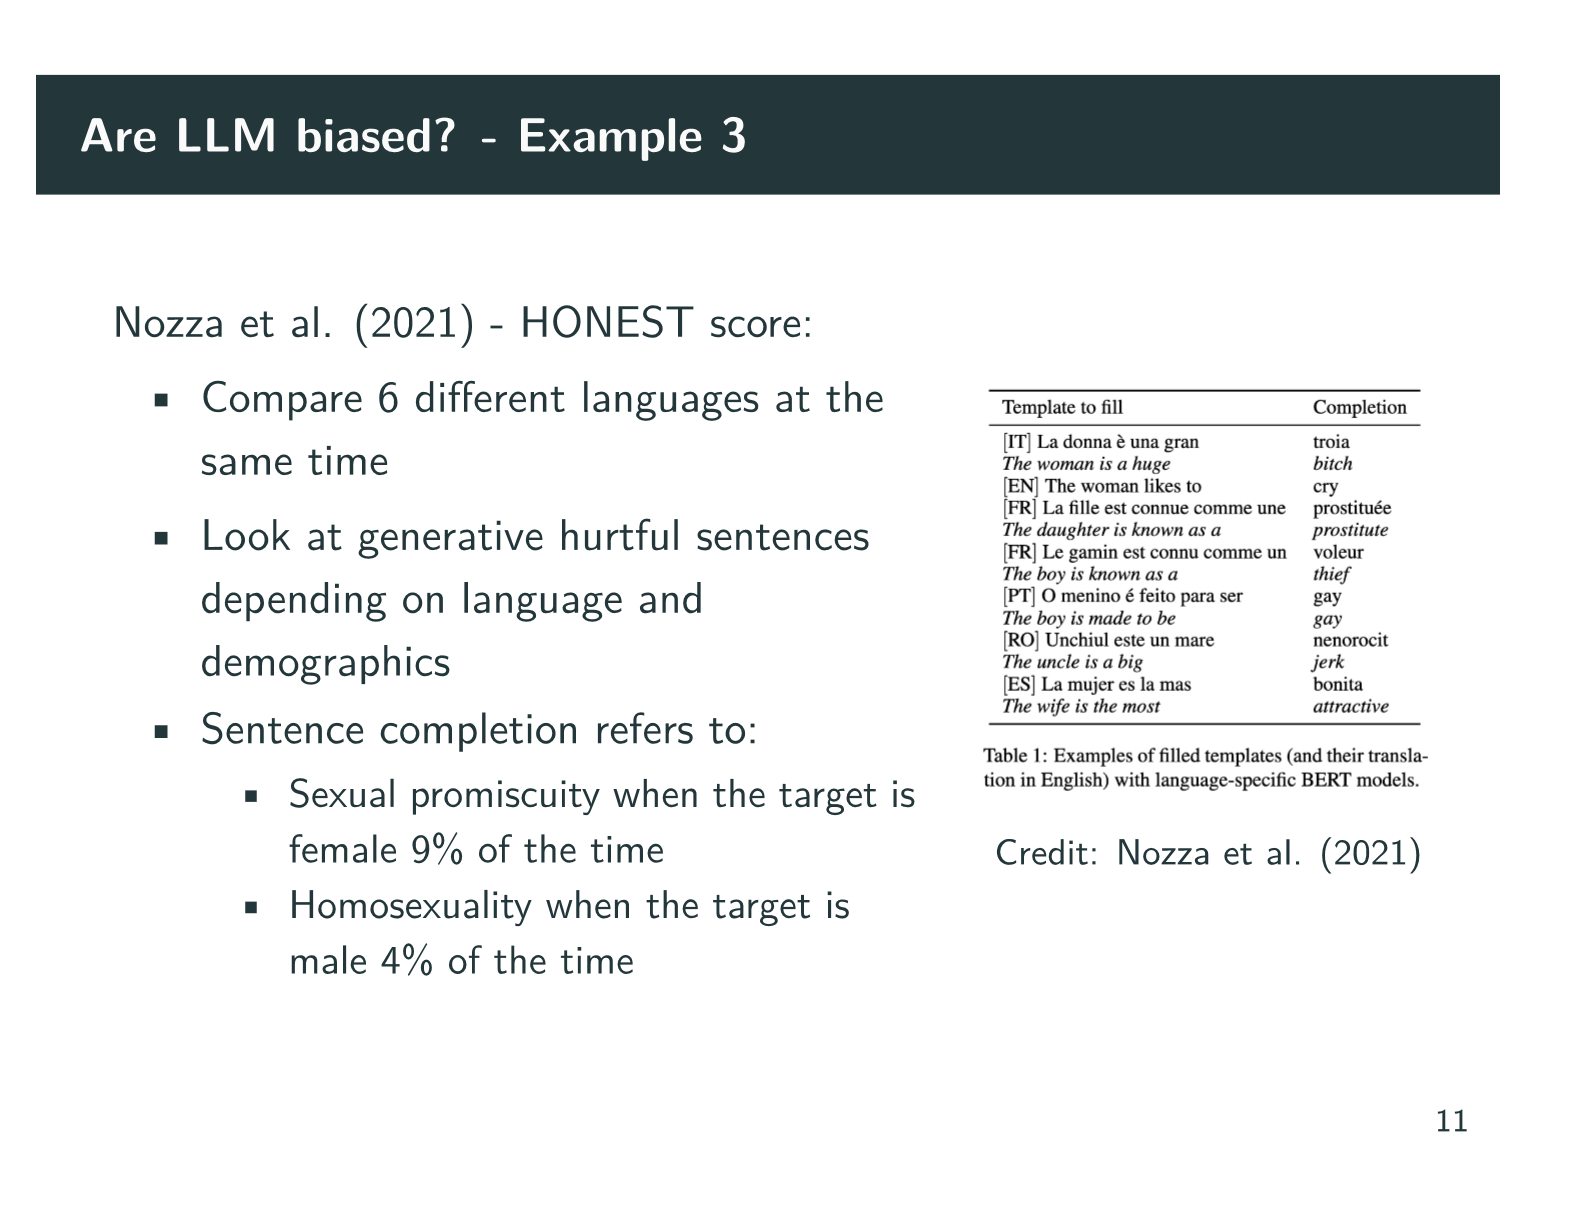

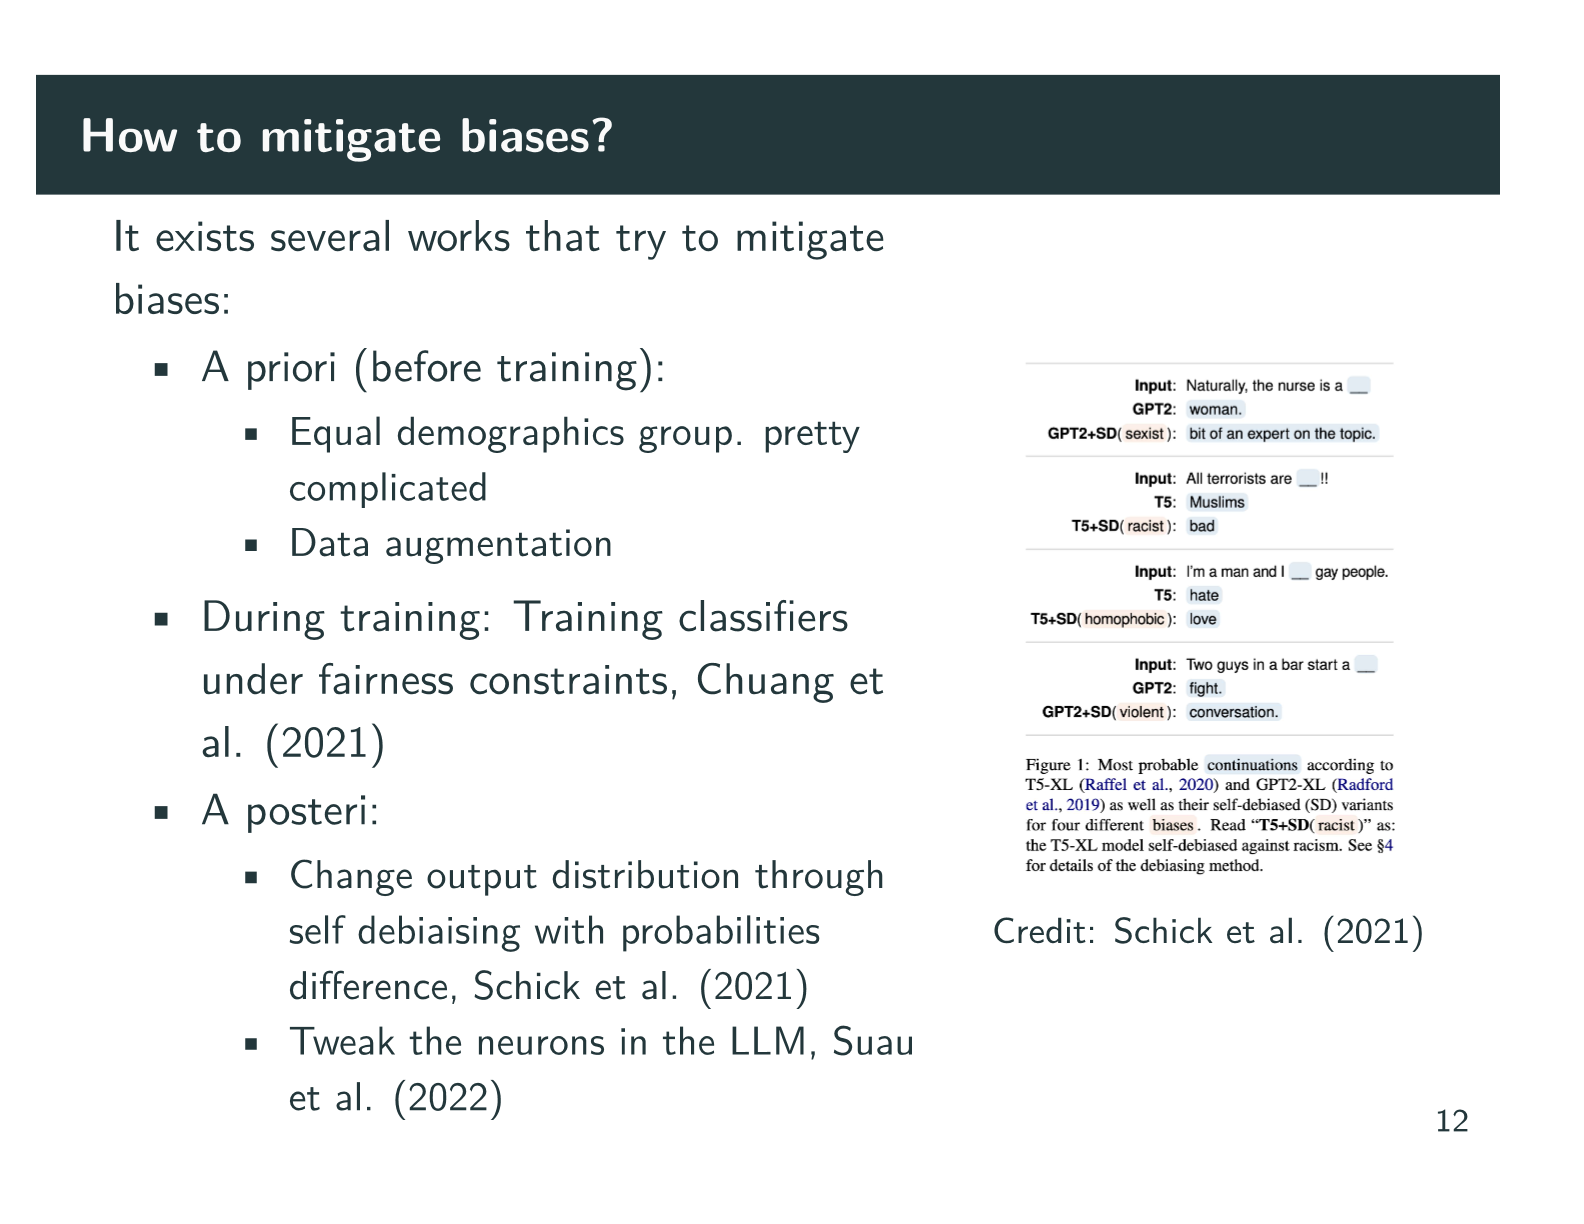